In [ ]:
import matplotlib.pyplot as plt
from matplotlib.ticker import LogLocator, MultipleLocator, AutoMinorLocator

import matplotlib

### set the plotting parameters
params = {
    'savefig.dpi': 300, 
    'xtick.direction': 'in',
    'ytick.direction': 'in',
    'font.size': 12, 
    'text.usetex': False,
    "font.family": "Arial",
}

matplotlib.rcParams.update(params)

from astropy import units
from astropy import constants

### Load Data

In [2]:
import numpy as np
import pandas as pd

# functions to load gach_rud data
def simple_file_loader(fpath, skiprow=None):
    with open(fpath, "r") as fp:
        lines = fp.readlines()
    if skiprow is not None: lines = lines[skiprow+1:]
    lines = [l.strip().split() for l in lines]
    if "misc" in fpath:
        lines = [[*l[:2], " ".join(l[2:])] for l in lines]
    return np.array(lines)



def make_data_frame(xdata, ydata, label):
    df = pd.DataFrame(dict(xdata=xdata, ydata=ydata))
    df["label"] = label
    return df

In [27]:
data_list = []
datapath = "./gach_rud"
### start to load data...
# pulsar
data = simple_file_loader(f"{datapath}/psrs_2")
df = make_data_frame(
    xdata = data[:, 4].astype(float),
    ydata = data[:, 5].astype(float),
    label = "pulsar"
)
data_list.append(df)

# crab nano giant pulse
data = simple_file_loader(f"{datapath}/crab_nanogiant")
df = make_data_frame(
    xdata = data[:, 0].astype(float),
    ydata = data[:, 1].astype(float),
    label = "crabnano"
)
data_list.append(df)

# crab giant pulse
data = simple_file_loader(f"{datapath}/crab_GRP")
df = make_data_frame(
    xdata = data[:, 5].astype(float),
    ydata = data[:, 4].astype(float),
    label = "crabgrp"
)
data_list.append(df)

# pulsar giant radio pulse
data = simple_file_loader(f"{datapath}/GRPs_vals", skiprow=0)
df = make_data_frame(
    xdata = data[:, 6].astype(float),
    ydata = data[:, 7].astype(float),
    label = "psrgrp"
)
data_list.append(df)

# rrat
data = simple_file_loader(f"{datapath}/rrats_nohead")
df = make_data_frame(
    xdata = data[:, 4].astype(float),
    ydata = data[:, 5].astype(float),
    label = "rrat"
)
data_list.append(df)

# frb
data = simple_file_loader(f"{datapath}/frbs_vals_to_plot")
df = make_data_frame(
    xdata = data[:, 1].astype(float),
    ydata = data[:, 0].astype(float),
    label = "frb"
)
data_list.append(df)

# solar bursts
data = simple_file_loader(f"{datapath}/solar_vals", skiprow=0)
df = make_data_frame(
    xdata = data[:, 4].astype(float),
    ydata = data[:, 5].astype(float),
    label = "solar"
)
data_list.append(df)

# SGR 1935
data = simple_file_loader(f"{datapath}/SGR1935+2154")
df = make_data_frame(
    xdata = data[:, 2].astype(float) * data[:, 3].astype(float),
    ydata = data[:, 0].astype(float) * (data[:, 1].astype(float)) ** 2,
    label = "sgr1935"
)
data_list.append(df)

### slow variables
data = simple_file_loader(f"{datapath}/solar_vals", skiprow=0)
df = make_data_frame(
    xdata = data[:, 4].astype(float),
    ydata = data[:, 5].astype(float),
    label = "solar"
)
data_list.append(df)

# ### I am not sure what is this flarey boi...
# data = simple_file_loader(f"{datapath}/flarey_boi")
# df = make_data_frame(
#     xdata = data[:, 0].astype(float),
#     ydata = data[:, 1].astype(float),
#     label = "flareyboi"
# )
# data_list.append(df)

# several objects, including Jupiter DAM etc.
data = simple_file_loader(f"{datapath}/misc")
df = make_data_frame(
    xdata = data[:, 0].astype(float),
    ydata = data[:, 1].astype(float),
    label = data[:, 2]
)
data_list.append(df)

# AGN QSO
data = simple_file_loader(f"{datapath}/Gosia_AGN_QSO_Blazar_TDE2", skiprow=0)
df = make_data_frame(
    xdata = data[:, 1].astype(float) * data[:, 8].astype(float) * 86400,
    ydata = data[:, 6].astype(float) * 1.05026e-20,
    label = "agn"
)
data_list.append(df)

# XRB
data = simple_file_loader(f"{datapath}/Gosia_XRB2")
df = make_data_frame(
    xdata = data[:, 1].astype(float) * data[:, 8].astype(float) * 86400,
    ydata = data[:, 6].astype(float) * 1.05026e-20,
    label = "xrb"
)
data_list.append(df)

# GRB
data = simple_file_loader(f"{datapath}/Gosia_GRB2")
df = make_data_frame(
    xdata = data[:, 1].astype(float) * data[:, 8].astype(float) * 86400,
    ydata = data[:, 6].astype(float) * 1.05026e-20,
    label = "grb"
)
data_list.append(df)

# SN
data = simple_file_loader(f"{datapath}/Gosia_SN2")
df = make_data_frame(
    xdata = data[:, 1].astype(float) * data[:, 8].astype(float) * 86400,
    ydata = data[:, 6].astype(float) * 1.05026e-20,
    label = "sn"
)
data_list.append(df)

# rscvn
data = simple_file_loader(f"{datapath}/Gosia_RSCVn2")
df = make_data_frame(
    xdata = data[:, 1].astype(float) * data[:, 8].astype(float) * 86400,
    ydata = data[:, 6].astype(float) * 1.05026e-20,
    label = "rscvn"
)
data_list.append(df)

# flare star
data = simple_file_loader(f"{datapath}/Gosia_flare_stars2")
df = make_data_frame(
    xdata = data[:, 1].astype(float) * data[:, 8].astype(float) * 86400,
    ydata = data[:, 6].astype(float) * 1.05026e-20,
    label = "star"
)
data_list.append(df)

# novae
data = simple_file_loader(f"{datapath}/Gosia_Novae2")
df = make_data_frame(
    xdata = data[:, 1].astype(float) * data[:, 8].astype(float) * 86400,
    ydata = data[:, 6].astype(float) * 1.05026e-20,
    label = "novae"
)
data_list.append(df)

# mcv
data = simple_file_loader(f"{datapath}/Gosia_MagCV2", skiprow=0)
df = make_data_frame(
    xdata = data[:, 1].astype(float) * data[:, 8].astype(float) * 86400,
    ydata = data[:, 6].astype(float) * 1.05026e-20,
    label = "mcv"
)
data_list.append(df)

# gw170817
data = simple_file_loader(f"{datapath}/gw170817")
df = make_data_frame(
    xdata = data[:, 0].astype(float),
    ydata = data[:, 1].astype(float),
    label = "gw170817"
)
data_list.append(df)

#lpt
data = simple_file_loader(f"{datapath}/lpt")
df = make_data_frame(
    xdata = data[:, 1].astype(float),
    ydata = data[:, 2].astype(float),
    label = "lpt"
)
data_list.append(df)

#### combine all data together
pdf = pd.concat(data_list)

### Load Plot Marker Configurations

In [28]:
plotconfig = pd.read_csv("./plotconfig.csv")

def find_label_color(label):
    lrow = plotconfig[plotconfig["label"] == label]
    if len(lrow) == 0: return "k"
    return lrow.iloc[0]["color"]

def format_text_argument(row):
    text = row["text"].replace("\\n", "\n")
    return dict(x=row["x"], y=row["y"], s=text, color=row["color"])

textplot = pd.read_csv("./plottext.csv", comment='!')#escapechar="\\")


(1e-10, 1e+16)

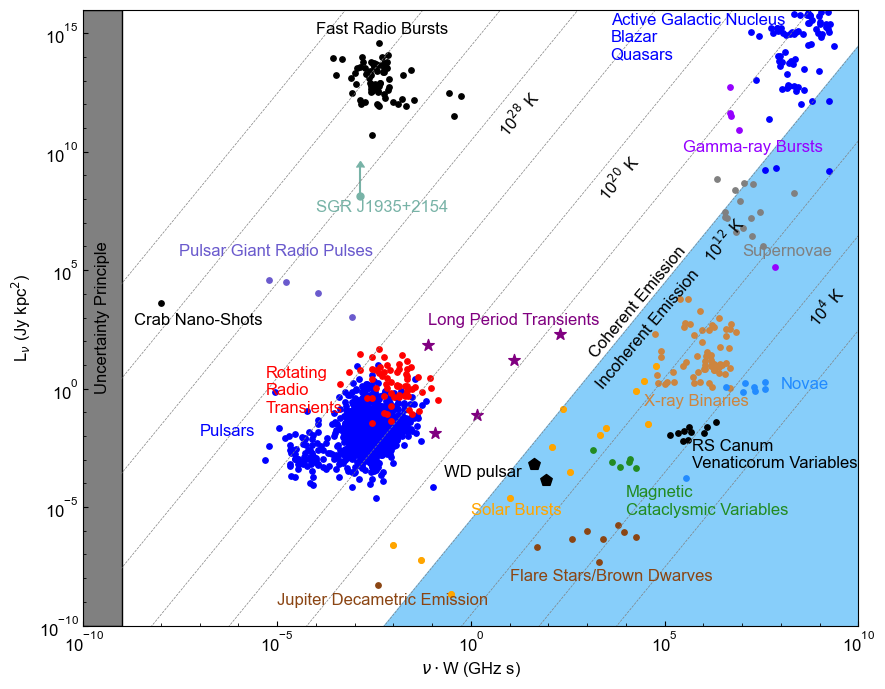

In [29]:
fig = plt.figure(figsize=(10, 8))
# fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(1, 1, 1)

labels = pdf["label"].unique()
for label in labels:
    sdf = pdf[pdf["label"] == label]
    if label == "lpt":
        ax.scatter(sdf["xdata"], sdf["ydata"], s=75, color="purple", marker="*",)
    elif label == "GCRT":
        ax.scatter(sdf["xdata"], sdf["ydata"], s=75, color="purple", marker="*",)
    elif label == "sgr1935":
        color = find_label_color(label)
        ax.errorbar(sdf["xdata"], sdf["ydata"], yerr=15*sdf["ydata"], lolims=True, color=color, marker="o", markersize=5)
    else:
        color = find_label_color(label)
        ax.scatter(sdf["xdata"], sdf["ydata"], s=15, color=color, marker="o")

for i, row in textplot.iterrows():
    kwargs = format_text_argument(row)
    ax.text(**kwargs)

### two white dwarfs...
ax.scatter(84, 1.46e-4, color="k", marker="p", s=75) # AR Sco
ax.scatter(41.34, 6.7e-4, color="k", marker="p", s=75) # J1912
ax.text(x=2e-1, y=2e-4, color="k", s="WD pulsar")

### adding uncertainty principle region
ax.axvspan(xmin=1e-11,xmax=1e-9, color="gray", ec="k")
ax.text(x=2e-10, y=1e3, s="Uncertainty Principle", va="center", rotation=90)

### adding TB
TBs = np.logspace(0, 40, 11)
xx = np.logspace(-10, 10, 10)
for TB in TBs:
    # yy = (2*constants.k_B*TB*units.Kelvin*(xx * units.GHz * units.second) ** 2).to("Jy kpc^2").value
    yy = TB * 2.761*1.05025e-18 * xx**2
    ax.plot(xx, yy, ls="--", color="gray", lw=0.5)

### plot brighness temperature text...
ax.text(x=4e8,y=4e2,s=r"10$^4$ K", rotation=50.)
ax.text(x=8e5,y=2e5,s=r"10$^1$$^2$ K", rotation=50.)
ax.text(x=1.5e3,y=8e7,s=r"10$^2$$^0$ K", rotation=50.)
ax.text(x=4,y=4e10,s=r"10$^2$$^8$ K", rotation=50.)

### plot 10^12 K line
ax.fill_between(xx, 1e12 * 2.761*1.05025e-18 * xx**2, color="#87CEFA", zorder=-1)
ax.text(x=1e3,y=20,s="Coherent Emission", rotation=50.)
ax.text(x=1.5e3,y=1e0,s="Incoherent Emission", rotation=50.)

ax.set_yscale("log")
ax.set_xscale("log")

ax.set_ylabel(r"L$_\nu$ (Jy kpc$^2$)")
ax.set_xlabel(r"$\nu\cdot$W (GHz s)")

ax.xaxis.set_ticks(np.logspace(-10, 10, 5))
ax.xaxis.set_ticks(np.logspace(-10, 10, 21), minor=True, labels=[])
ax.yaxis.set_ticks(np.logspace(-10, 20, 7))
ax.yaxis.set_ticks(np.logspace(-10, 20, 31), minor=True, labels=[])


ax.set_xlim(1e-10, 1e10)
ax.set_ylim(1e-10, 1e16)
